<center>Tato studijní pomůcka vznikla za podpory Inovačního projektu FSv ČVUT č. 15 "Inovativní pomůcky pro předměty Přetváření a porušování materiálů".</center>
<center>(c) 2024 Lenka Dohnalová <i>(lenka.dohnalova@fsv.cvut.cz)</i>, Petr Havlásek <i>(petr.havlasek@cvut.cz)</i>, Milan Jirásek <i>(milan.jirasek@cvut.cz)</i></center>

***
# Jednoduché viskoelastické modely

Cheatsheet pro psaní Markdown poznámek<br>
https://ingeh.medium.com/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed<br>
https://dynamics-and-control.readthedocs.io/en/latest/0_Getting_Started/Notebook%20introduction.html

## Zadání
Je zadaný viskoelastický model tvořený třemi pružinami a dvěma tlumiči. 
1. V semilogaritmickém měřítku sestrojte graf funkce poddajnosti, vyznačte složky odpovídající jednotlivým částem modelu.
2. Uvažujte dotvarovací zkoušku při napětí $\bar{\sigma} = 20$ MPa. Určete hodnotu napětí ve všech článcích pro okamžik vnesení zatížení. Vypočtěte celkovou deformaci pro okamžik vnesení zatížení a také pro velmu dlouhou dobu trvání zatížení.
3. Vypočtěte hodnotu relaxační funkce pro velmi dlouhou dobu trvání zatížení

<img src="./zadani.png" title="Viskoelastický řetězec" style="width: 400px;margin-left:auto; margin-right:auto"/>
<p style="text-align:center">Obrázek 1: Viskoelastický řetězec</p>


**Zadané hodnoty materiálových parametrů:**<br>
$E_0 = 20$ GPa<br>
$E_1 = 10$ GPa, $\eta_1 = 10$ GPa$\cdot$den<br>
$E_2 = 5$ GPa, $\eta_2 = 20$ GPa$\cdot$den

***


Import potřebných knihoven

In [50]:
%matplotlib inline

import math
import numpy as np

from IPython.display import Markdown as md

import matplotlib.pyplot as plt

!pip install sympy
from sympy import *
import sympy as smp


## Řešení

### Analytické řešení

**Definice proměnných**

In [21]:
t = smp.symbols('t', real = True, positive = True)

E_0 = smp.symbols('E_0', real = True, positive = True)

E_1, η_1 = smp.symbols(r'E_1 \eta_1', real = True, positive = True)
τ_1 = η_1/E_1

E_2, η_2 = smp.symbols(r'E_2 \eta_2', real = True, positive = True)
τ_2 = η_2/E_2

**Funkce poddajnosti**

In [23]:
J_0 = 1/E_0
J_1 = 1/E_1 * ( 1 - smp.exp(-t/τ_1) )
J_2 = 1/E_2 * ( 1 - smp.exp(-t/τ_2) )

J = J_0 + J_1 + J_2
J.simplify()

1/E_2 - exp(-E_2*t/\eta_2)/E_2 + 1/E_1 - exp(-E_1*t/\eta_1)/E_1 + 1/E_0

**Definice a dosazení materiálových parametrů**

In [104]:
val_E_0 = 20 # GPa
val_E_1 = 10 # GPa
val_E_2 = 5  # GPa
val_η_1 = 10 # GPa*den
val_η_2 = 20 # GPa*den


In [105]:
J = J.subs([(E_0,val_E_0)])
J = J.subs([(E_1,val_E_1), (η_1,val_η_1)])
J = J.subs([(E_2,val_E_2), (η_2,val_η_2)])
J.simplify()

7/20 - exp(-t)/10 - exp(-t/4)/5

**Vyhodnocení funkce poddajnosti pro okamžik zatížení a velmi dlouhou dobu zatížení**

In [106]:
J_init = J.subs([(t,0)])
J_long = J.subs([(t,1e6)])


md("Hodnota funkce poddajnosti ihned po vnesení zatížení $J_{init}$ je " + f"{J_init:.3f}"  + " GPa$^{-1}$<br>" +
"Hodnota funkce poddajnosti pro velmi dlouhou dobu trvání zatížení $J_{long}$ je " + f"{J_long:.3f}"  + " GPa$^{-1}$")


Hodnota funkce poddajnosti ihned po vnesení zatížení $J_{init}$ je 0.050 GPa$^{-1}$<br>Hodnota funkce poddajnosti pro velmi dlouhou dobu trvání zatížení $J_{long}$ je 0.350 GPa$^{-1}$

**Nalezení času, kdy se funkce poddajnosti rovná předepsané hodnotě**

In [107]:
J_interest = J_init + (J_long-J_init)/2. # GPa^-1

t_interest = smp.solve(J-J_interest)[0]

md("Hodnoty funkce poddajnosti $J_{interest} =$ " + f"{J_interest:.3f}"  + " GPa$^{-1}$ " +
   "je dosaženo v čase $t_{interest} = $" + f"{t_interest:.3f} dní")
   

Hodnoty funkce poddajnosti $J_{interest} =$ 0.200 GPa$^{-1}$ je dosaženo v čase $t_{interest} = $1.681 dní

**Vývoj funkce poddajnosti**

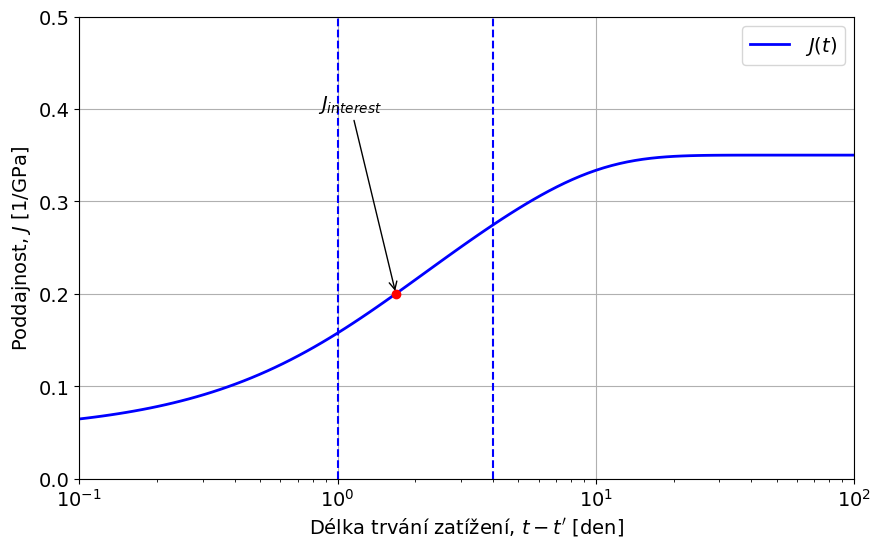

In [182]:
# J_expr = smp.lambdify([t],J)

t_num = np.logspace(-1,2,100)
J_num = J_expr(t_num)

#fig, ax = plt.subplots(figsize=(10,6))

plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})

plt.plot(t_num, J_num, lw=2., color="blue", label=r'$J(t)$')

x = float(t_interest)
y = float(J.subs([(t,t_interest)]))
plt.plot(x, y, 'o', color = 'red')

# vertical line corresponding to characteristic (retardation) time
plt.axvline(x = τ_1.subs([(E_1,val_E_1), (η_1,val_η_1)]), lw=1.5, color="blue", linestyle = "--")
plt.axvline(x = τ_2.subs([(E_2,val_E_2), (η_2,val_η_2)]), lw=1.5, color="blue", linestyle = "--")


plt.xscale('log')

plt.grid(True)
plt.legend()
plt.xlabel('Délka trvání zatížení, $t-t\'$ [den]')
plt.ylabel('Poddajnost, $J$ [1/GPa]')

plt.xlim((1e-1,1e2))
plt.ylim((0,0.5))


xt = x/2
yt = 2*y

plt.annotate('$J_{interest}$', xy=(x,y), xytext=(xt,yt), arrowprops=dict(arrowstyle='->'))

#plt.arrow(x, y, dx, dy, width = 0.05)

plt.savefig('Kelvin_chain_compliance_function.pdf')

plt.show()
